#Menginstall kaggle dan meng-import Dataset

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"malvinpa","key":"7a6750bf40e3dc3af0bec838d2e93eff"}'}

Upload Kaggle.json untuk menggunakan Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shwetabh123/mall-customers

import zipfile
import os

for file in os.listdir():
     if file.endswith('.zip'):
         zip_ref = zipfile.ZipFile(file, 'r')
         zip_ref.extractall()
         zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/shwetabh123/mall-customers
License(s): CC0-1.0
  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 6.52MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Visualization

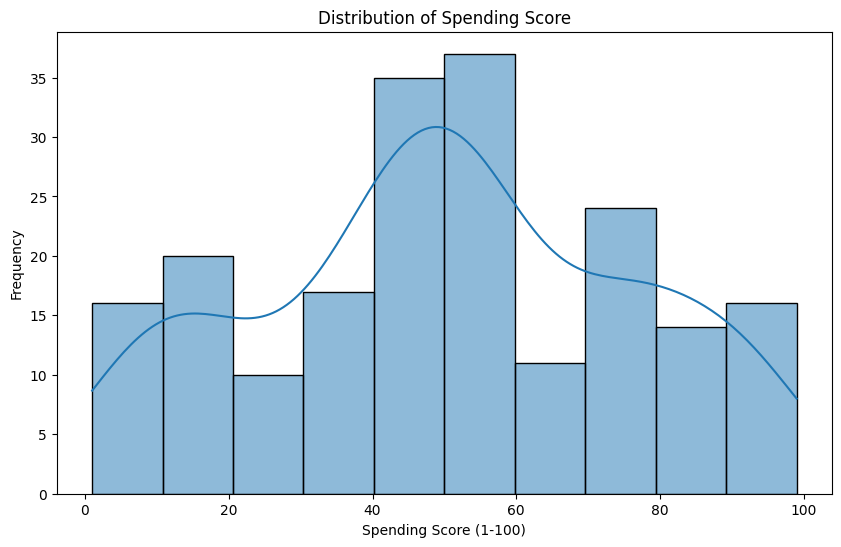

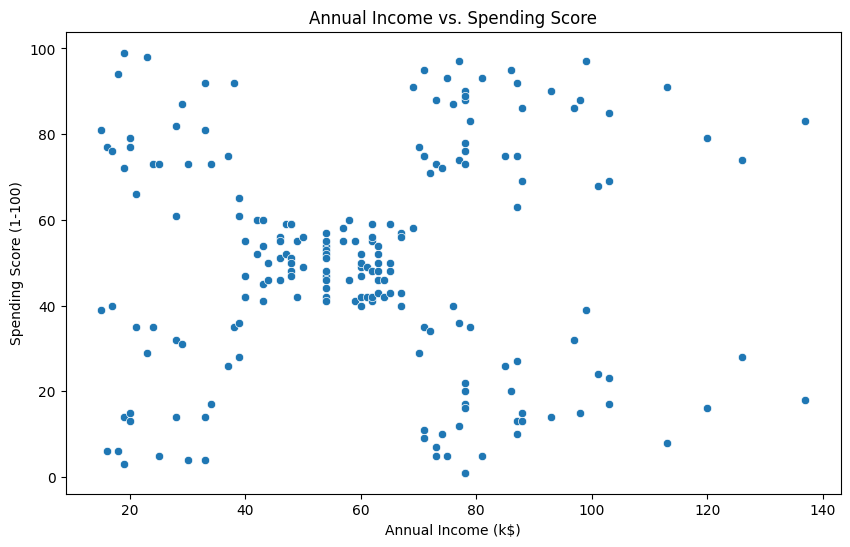

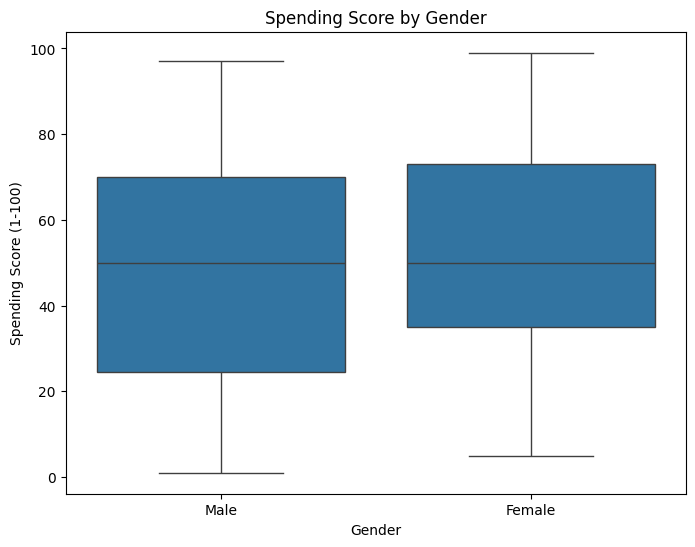

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original data as requested by the user
df = pd.read_csv('Mall_Customers.csv')

# 1. Histogram for Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter Plot between Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 3. Boxplot of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

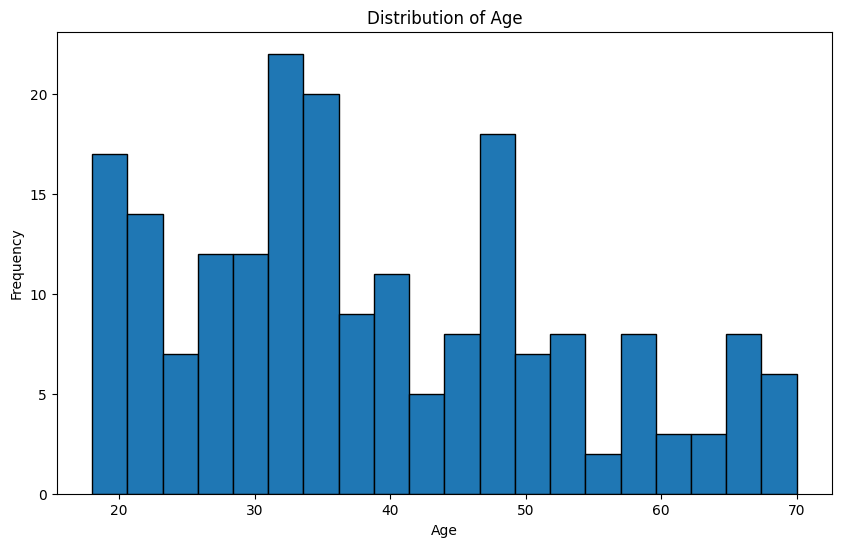

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

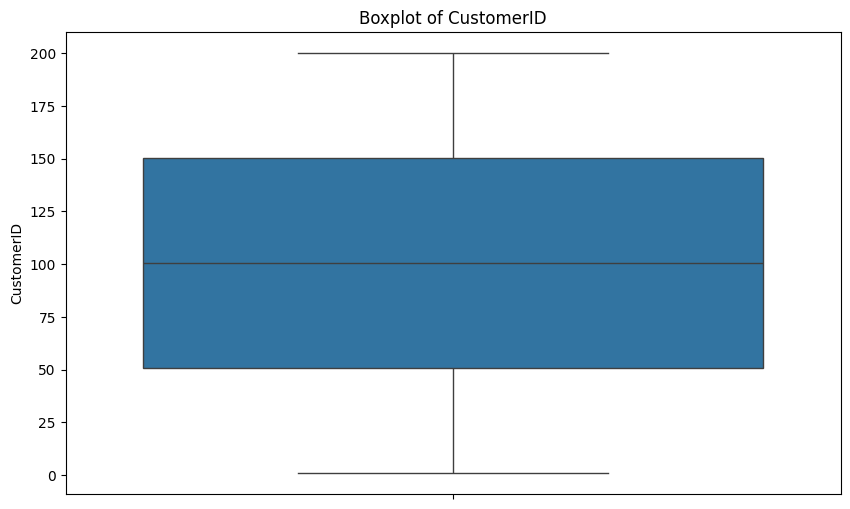

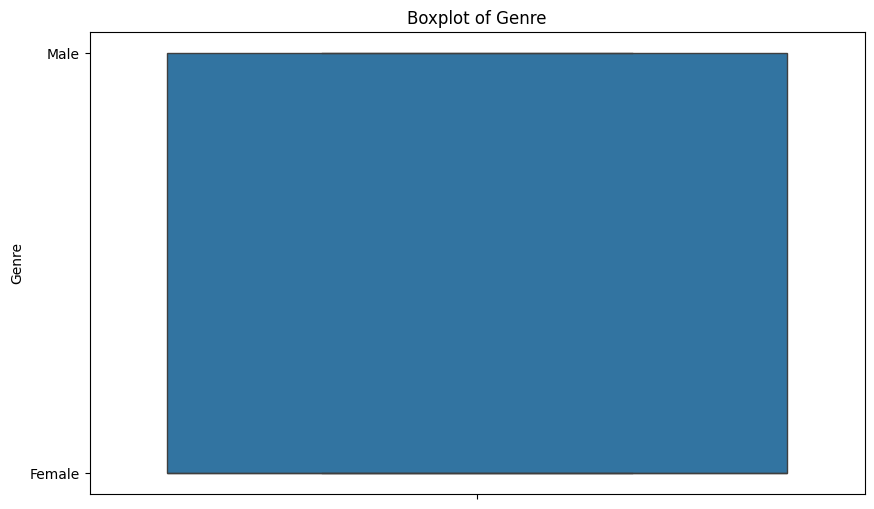

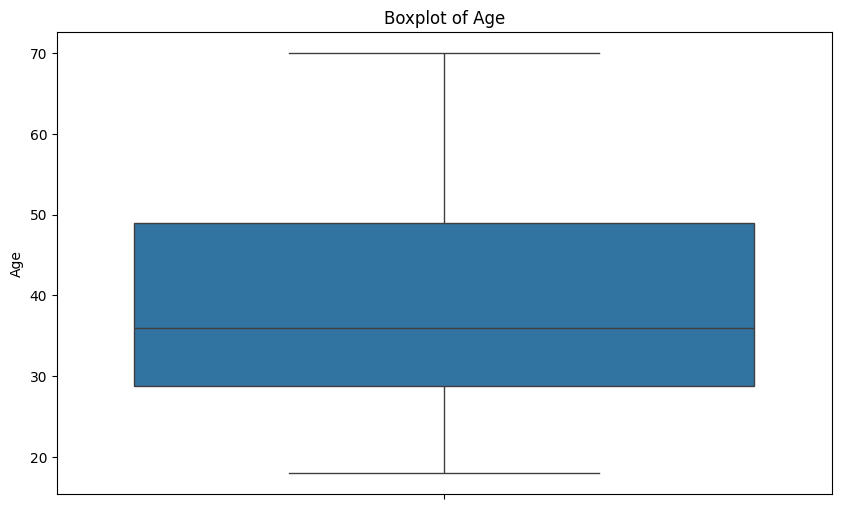

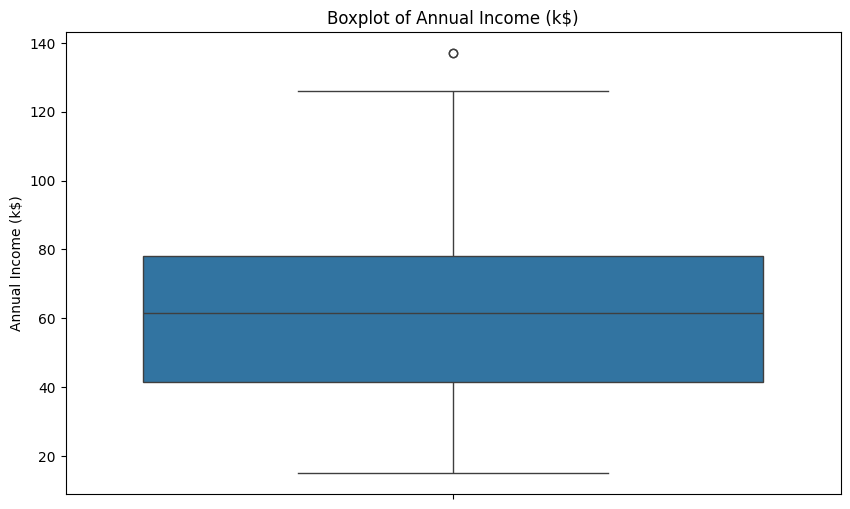

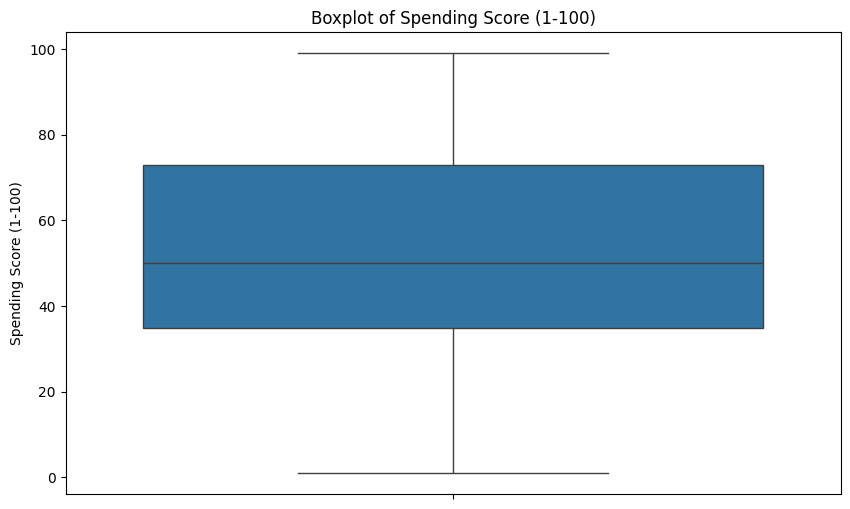

In [ ]:
for i in df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

#Preprocessing

#Remove Outliers

In [ ]:
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3 - q1

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    lower_bound = q1[col] - 1.5 * iqr[col]
    upper_bound = q3[col] + 1.5 * iqr[col]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"DataFrame shape after outlier removal: {df.shape}")

DataFrame shape after outlier removal: (198, 5)


#Embedding and removing unnecesary columns

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [ ]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
y = df['Spending Score (1-100)']
X = df.drop(['Spending Score (1-100)'], axis=1)

#Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 20.37
Mean Squared Error (MSE): 602.12
R-squared (R2): 0.12


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1, None],
    'positive': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best Cross-Validation Score: 0.0350


In [ ]:
lr_hp = LinearRegression(**best_params)

lr_hp.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_pred_hp = lr_hp.predict(X_test)
mae_hp = mean_absolute_error(y_test, y_pred_hp)
mse_hp = mean_squared_error(y_test, y_pred_hp)
r2_hp = r2_score(y_test, y_pred_hp)

print(f"Mean Absolute Error after hyperparameter tuning: {mae_hp:.2f}")
print(f"Mean Squared Error after hyperparameter tuning: {mse_hp:.2f}")
print(f"R-squared (R2) after hyperparameter tuning: {r2_hp:.2f}")

Mean Absolute Error after hyperparameter tuning: 20.37
Mean Squared Error after hyperparameter tuning: 602.12
R-squared (R2) after hyperparameter tuning: 0.12
